<a href="https://colab.research.google.com/github/ganesh10-code/ML_lab/blob/main/Ensemble_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ensemble Learning**

# Task:1 comparing single Decision Tree and Ensembled Random Forest Classifier

Fitting 5 folds for each of 324 candidates, totalling 1620 fits

Decision Tree Performance:
Accuracy : 0.7363
Precision: 0.7955
Recall   : 0.7000
F1-score : 0.7447

Random Forest(Grid Search) Performance:
Accuracy : 0.8571
Precision: 0.8627
Recall   : 0.8800
F1-score : 0.8713
✅ Best Parameters: {'max_depth': 5, 'min_samples_split': 20, 'n_estimators': 30}
✅ Best Accuracy : 0.8440753045404208


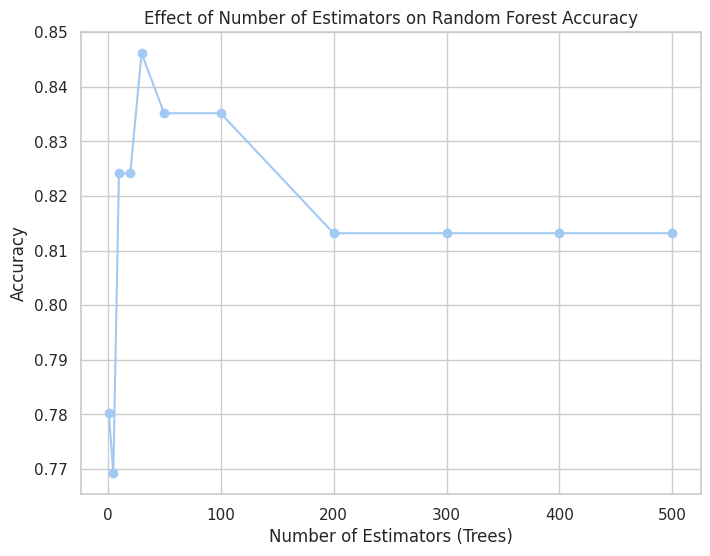

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt

#Loading Heart Disease Dataset
data = pd.read_csv('/kaggle/input/classification-dataset/heart.csv')
X = data.drop(columns='target')
y = data['target']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


# Train Single Decision Tree

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)


#Random Forest using Grid Search (Autometed Hyper-parameter Tunning)
param_grid = {
    'n_estimators': [10, 20, 30, 50, 100, 150, 200, 250, 300],
    'max_depth': [None, 1, 3, 5, 10, 15],
    'min_samples_split': [2, 5, 10,15,20,30]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)
y_pred_gd = grid_search.predict(X_test)


# Evaluation Metrics
def evaluate_model(name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    pre = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"\n{name} Performance:")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {pre:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1-score : {f1:.4f}")
    return acc, pre, rec, f1

dt_scores = evaluate_model("Decision Tree", y_test, y_pred_dt)
rf_gd_scores = evaluate_model("Random Forest(Grid Search)", y_test, y_pred_gd)

print("✅ Best Parameters:", grid_search.best_params_)
print("✅ Best Accuracy :", grid_search.best_score_)


# Effect of n_estimators

n_estimators_list = [1, 5, 10, 20, 30, 50, 100, 200, 300, 400, 500]
accuracies = []

for n in n_estimators_list:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)



# Plot accuracy vs. number of estimators
plt.figure(figsize=(8, 6))
plt.plot(n_estimators_list, accuracies, marker='o')
plt.title("Effect of Number of Estimators on Random Forest Accuracy")
plt.xlabel("Number of Estimators (Trees)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

**- What differences do you observe between the Decision Tree and Random Forest results?**

  Decision Tree:
  - Accuracy is lower and less stable.
  - Tends to overfit (memorizes training data).
  - Sensitive to noise — small data changes can alter results drastically.

  Random Forest:
  - Combines predictions from multiple trees → reduces overfitting.
  - More robust and generalized.
  - Shows higher accuracy, precision, recall, and F1-score.


**How does increasing the number of estimators affect performance and stability?**
- As we increase 'n_estimators', accuracy improves and stabilizes.
- Small number of trees (1 or 5) → high variance.
- Around 100+ trees → performance saturates (stable and reliable).
- Beyond that, gain is minimal but computation cost increases.


**Why does Random Forest generally perform better than a single Decision Tree?**
- It is an *ensemble* method → averages results of many trees.
- Reduces variance (stability) without increasing bias too much.
- Each tree learns from a random subset of features → more diversity.
- Ensemble voting makes the final model more accurate and robust.

# Task 2  Implementing Simple Ensemble Techniques


=== Individual & Ensemble Performance ===
                    accuracy  precision  recall      f1
Logistic              0.9415     0.9292  0.9813  0.9545
DecisionTree          0.9181     0.9346  0.9346  0.9346
KNN                   0.9240     0.9352  0.9439  0.9395
HardVoting            0.9357     0.9364  0.9626  0.9493
SoftVoting_Avg        0.9357     0.9364  0.9626  0.9493
WeightedSoftVoting    0.9357     0.9364  0.9626  0.9493

Cross-Validation Accuracies and Weights:
              CV_Accuracy  Weight
Model                            
Logistic           0.9524  0.3396
DecisionTree       0.9171  0.3270
KNN                0.9347  0.3333


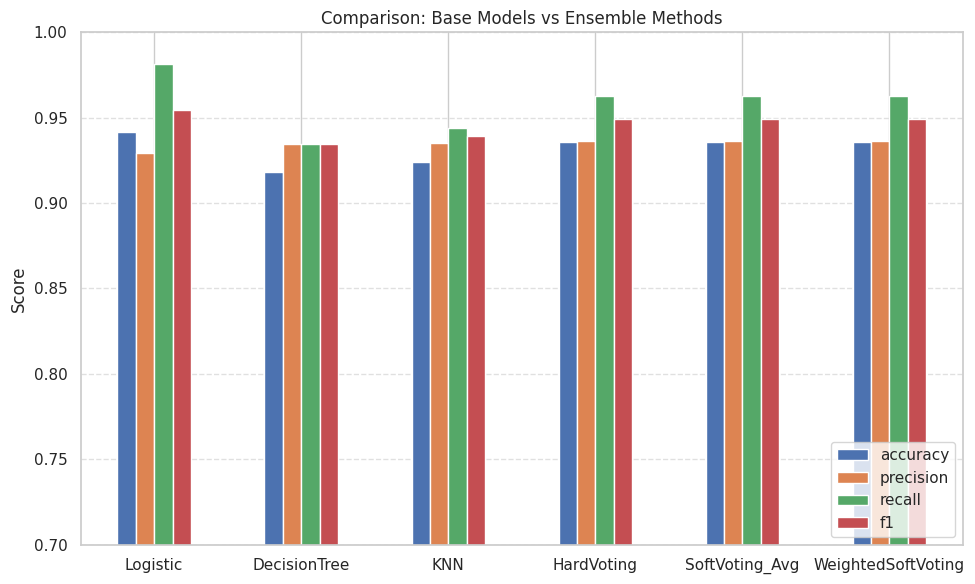


=== Classification Reports (Ensembles) ===

Hard Voting:
               precision    recall  f1-score   support

   malignant       0.93      0.89      0.91        64
      benign       0.94      0.96      0.95       107

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171

Soft Voting (Average):
               precision    recall  f1-score   support

   malignant       0.93      0.89      0.91        64
      benign       0.94      0.96      0.95       107

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171

Weighted Soft Voting:
               precision    recall  f1-score   support

   malignant       0.93      0.89      0.91        64
      benign       0.94      0.96      0.95       107

    accuracy                           0.94       171
   macro avg       0.9

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report)

sns.set(style="whitegrid")

def metrics_dict(y_true, y_pred):
    return {
        "accuracy": accuracy_score(y_true, y_pred),
        "precision": precision_score(y_true, y_pred, zero_division=0),
        "recall": recall_score(y_true, y_pred, zero_division=0),
        "f1": f1_score(y_true, y_pred, zero_division=0)
    }

def print_metrics_table(results):
    df = pd.DataFrame(results).T
    df = df[["accuracy", "precision", "recall", "f1"]]
    print(df.round(4))
    return df

# Load Dataset
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

# Defining Base Models
clf_lr = LogisticRegression(max_iter=500, solver="liblinear", random_state=42)
clf_dt = DecisionTreeClassifier(random_state=42)
clf_knn = KNeighborsClassifier(n_neighbors=5)

base_models = [("Logistic", clf_lr), ("DecisionTree", clf_dt), ("KNN", clf_knn)]

# Train Each Base Model
for name, model in base_models:
    model.fit(X_train, y_train)

# Make Predictions
preds = {}
probs = {}

for name, model in base_models:
    preds[name] = model.predict(X_test)
    if hasattr(model, "predict_proba"):
        probs[name] = model.predict_proba(X_test)
    else:
        # fallback: convert predicted labels to one-hot probabilities
        p = np.zeros((X_test.shape[0], len(np.unique(y))))
        p[np.arange(X_test.shape[0]), model.predict(X_test)] = 1
        probs[name] = p

# Stack all predictions/probabilities for ensemble use
pred_array = np.stack([preds[name] for name, _ in base_models], axis=1)
prob_stack = np.stack([probs[name] for name, _ in base_models])

# Ensemble Methods

# (a) Hard Voting: Majority vote
hard_vote = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=1, arr=pred_array)

# (b) Soft Voting (Average)
avg_probs = np.mean(prob_stack, axis=0)
soft_vote = np.argmax(avg_probs, axis=1)

# (c) Weighted Soft Voting
# Determine weights using 5-fold cross-validation on training set
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = []

for name, model in base_models:
    scores = cross_val_score(model, X_train, y_train, cv=skf, scoring="accuracy", n_jobs=-1)
    cv_scores.append(scores.mean())

weights = np.array(cv_scores)
weights = weights / weights.sum()

# Weighted probabilities = weighted sum of model probabilities
weighted_prob = np.tensordot(weights, prob_stack, axes=(0, 0))
weighted_vote = np.argmax(weighted_prob, axis=1)

# 6. Evaluate Models
results = {}

# Individual Models
for name, _ in base_models:
    results[name] = metrics_dict(y_test, preds[name])

# Ensemble Models
results["HardVoting"] = metrics_dict(y_test, hard_vote)
results["SoftVoting_Avg"] = metrics_dict(y_test, soft_vote)
results["WeightedSoftVoting"] = metrics_dict(y_test, weighted_vote)

print("\n=== Individual & Ensemble Performance ===")
metrics_df = print_metrics_table(results)

# Show CV accuracies (used for weighting)
cv_info = pd.DataFrame({
    "Model": [name for name, _ in base_models],
    "CV_Accuracy": np.round(cv_scores, 4),
    "Weight": np.round(weights, 4)
}).set_index("Model")

print("\nCross-Validation Accuracies and Weights:")
print(cv_info)

# ---------- 7. Visualization ----------
plt.figure(figsize=(10, 6))
metrics_df.plot(kind="bar", rot=0, ax=plt.gca())
plt.title("Comparison: Base Models vs Ensemble Methods")
plt.ylabel("Score")
plt.ylim(0.7, 1.0)
plt.legend(loc="lower right")
plt.grid(axis="y", linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# ---------- 9. Detailed Reports ----------
print("\n=== Classification Reports (Ensembles) ===")
print("\nHard Voting:\n", classification_report(y_test, hard_vote, target_names=data.target_names))
print("Soft Voting (Average):\n", classification_report(y_test, soft_vote, target_names=data.target_names))
print("Weighted Soft Voting:\n", classification_report(y_test, weighted_vote, target_names=data.target_names))


**➤ How do results vary between Max Voting, Average Voting, and Weighted Voting?**

Max Voting: Simple but ignores probability confidence.

Average Voting: Considers model confidence; more stable.

Weighted Voting: Best in most cases, since it prioritizes models that perform better (based on CV).

**➤ What is the role of weights in improving ensemble predictions?**

Weights help to bias the ensemble towards models that are more accurate or reliable.
This reduces the influence of weaker models and improves robustness.

**➤ Which base classifiers combine most effectively under each scheme?**

Logistic + Decision Tree + KNN combine well because they are diverse.

Linear + Nonlinear + Distance-based models cover different data patterns, improving ensemble generalization.

# Task:3 Hard Voting vs. Soft Voting Classifiers

=== Base Model Accuracies ===
Logistic Regression : 0.7473
Decision Tree       : 0.7802
KNN                 : 0.6264

=== Ensemble Results ===
Hard Voting Accuracy : 0.7473
Soft Voting Accuracy : 0.7692

Classification Report (Hard Voting):
              precision    recall  f1-score   support

         Yes       0.72      0.71      0.72        41
          No       0.76      0.78      0.77        50

    accuracy                           0.75        91
   macro avg       0.74      0.74      0.74        91
weighted avg       0.75      0.75      0.75        91


Classification Report (Soft Voting):
              precision    recall  f1-score   support

         Yes       0.76      0.71      0.73        41
          No       0.77      0.82      0.80        50

    accuracy                           0.77        91
   macro avg       0.77      0.76      0.77        91
weighted avg       0.77      0.77      0.77        91



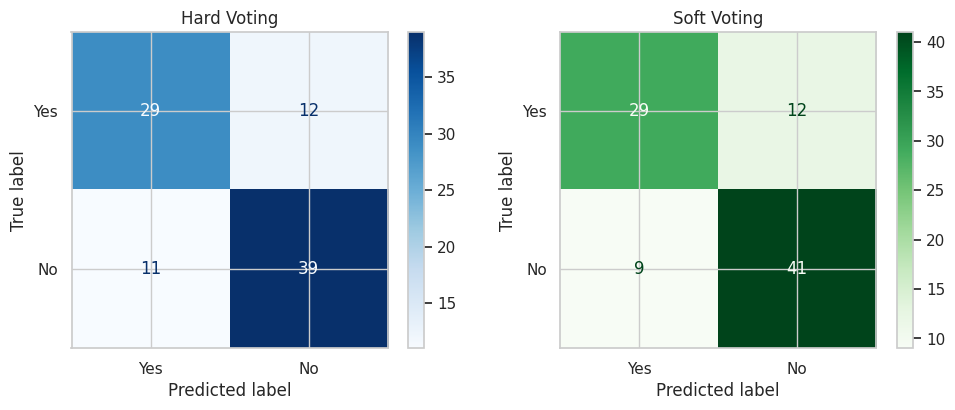

In [ ]:
# hard_vs_soft_voting.py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

sns.set(style="whitegrid")

# Load Dataset
data = pd.read_csv('/kaggle/input/classification-dataset/heart.csv')
X = data.drop(columns=['target'])
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

# Define Base Learners
clf_lr = LogisticRegression(max_iter=500, solver='liblinear', random_state=42)
clf_dt = DecisionTreeClassifier(max_depth=5, random_state=42)
clf_knn = KNeighborsClassifier(n_neighbors=7)

base_learners = [
    ('Logistic Regression', clf_lr),
    ('Decision Tree', clf_dt),
    ('KNN', clf_knn)
]

# Create Hard and Soft Voting Ensembles
hard_voting = VotingClassifier(estimators=base_learners, voting='hard')
soft_voting = VotingClassifier(estimators=base_learners, voting='soft')

# Train Both Ensembles
hard_voting.fit(X_train, y_train)
soft_voting.fit(X_train, y_train)

# Evaluate Base Models Individually
print("=== Base Model Accuracies ===")
for name, model in base_learners:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name:20s}: {accuracy_score(y_test, y_pred):.4f}")

# Evaluate Voting Classifiers
y_pred_hard = hard_voting.predict(X_test)
y_pred_soft = soft_voting.predict(X_test)

acc_hard = accuracy_score(y_test, y_pred_hard)
acc_soft = accuracy_score(y_test, y_pred_soft)

print("\n=== Ensemble Results ===")
print(f"Hard Voting Accuracy : {acc_hard:.4f}")
print(f"Soft Voting Accuracy : {acc_soft:.4f}")

print("\nClassification Report (Hard Voting):")
print(classification_report(y_test, y_pred_hard, target_names=['Yes','No']))

print("\nClassification Report (Soft Voting):")
print(classification_report(y_test, y_pred_soft, target_names=['Yes','No']))

# Confusion Matrices
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_hard, display_labels=['Yes','No'], cmap='Blues', ax=plt.gca())
plt.title("Hard Voting")

plt.subplot(1, 2, 2)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_soft, display_labels=['Yes','No'], cmap='Greens', ax=plt.gca())
plt.title("Soft Voting")

plt.tight_layout()
plt.show()

**➤ 1. What is the main difference in prediction mechanisms between hard and soft voting?**
Both Soft voting and Hard voting are the methods used in ensemble learning.

**Hard Voting** works by considering the maximum votes among the models

but **Soft Voting** considers the averaging of each probability.

**➤ 2. In which situations does soft voting outperform hard voting?**

When base models produce well-calibrated probabilities.

When classifiers have different confidence levels for predictions.

When some models are slightly wrong but highly confident (soft voting averages that confidence better).

Example:
If two models predict “malignant” with 0.51 probability and one predicts “benign” with 0.99,
soft voting correctly picks benign, but hard voting would pick malignant (majority = 2 votes).

**➤ 3. How does the probability calibration of base classifiers influence soft voting?**

Soft voting’s performance depends heavily on the quality of the predicted probabilities.

Well-calibrated models (like Logistic Regression) give accurate probabilities.

Poorly calibrated models (like unpruned Decision Trees) can output overconfident probabilities (close to 0 or 1).

# Task:4 Exploring Bagging Technique (Random Forest)


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


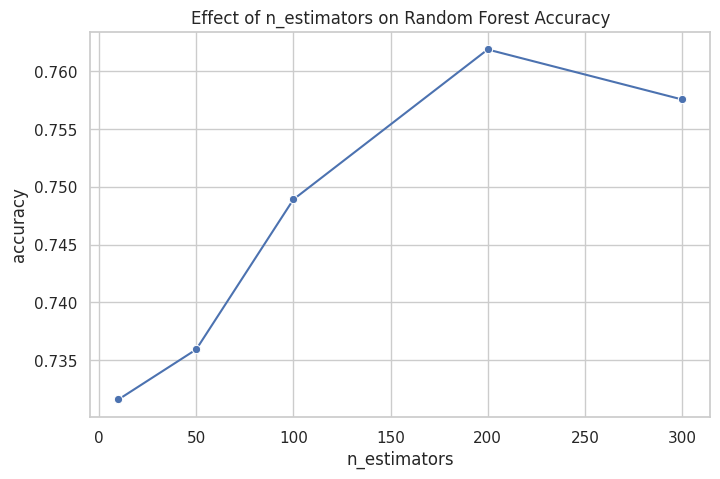

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


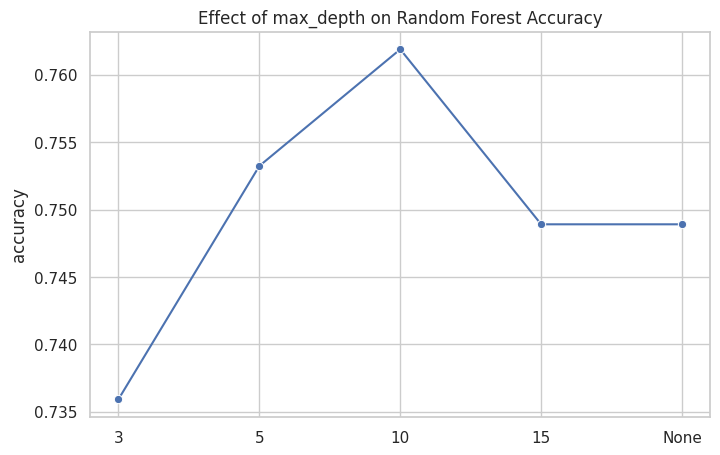

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


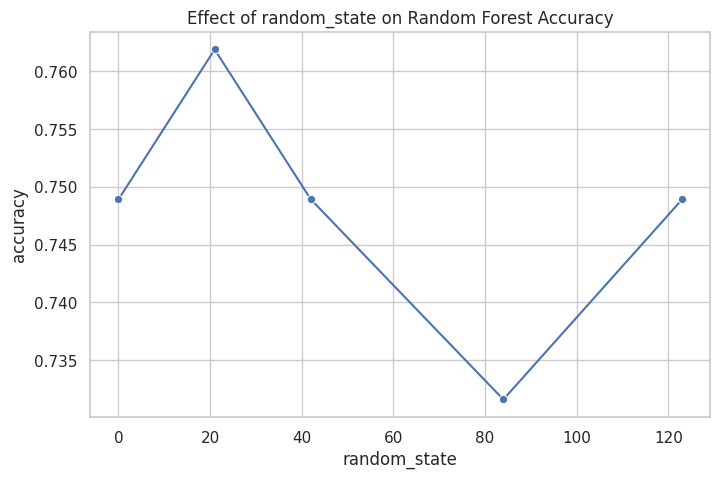

=== 🏆 Best Performing Configurations ===
Best n_estimators  → 200  with Accuracy = 0.7619
Best max_depth     → 10  with Accuracy = 0.7619
Best random_state  → 21  with Accuracy = 0.7619


In [ ]:
# bagging_exploration_random_forest_fixed.py

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

sns.set(style="whitegrid")

# Load Dataset

data = pd.read_csv('/kaggle/input/classification-dataset/diabetes.csv')
X = data.drop(columns='Outcome')
y = data['Outcome']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X.fillna(0), y, test_size=0.3, random_state=42, stratify=y
)

# Vary n_estimators

n_estimators_list = [10, 50, 100, 200, 300]
results_estimators = []

for n in n_estimators_list:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    acc = accuracy_score(y_test, rf.predict(X_test))
    results_estimators.append({"n_estimators": n, "accuracy": acc})

df_estimators = pd.DataFrame(results_estimators)

# Plot
plt.figure(figsize=(8, 5))
sns.lineplot(x="n_estimators", y="accuracy", data=df_estimators, marker="o")
plt.title("Effect of n_estimators on Random Forest Accuracy")
plt.grid(True)
plt.show()

# Vary max_depth

max_depth_list = [3, 5, 10, 15, None]
results_depth = []

for depth in max_depth_list:
    rf = RandomForestClassifier(n_estimators=100, max_depth=depth, random_state=42)
    rf.fit(X_train, y_train)
    acc = accuracy_score(y_test, rf.predict(X_test))
    results_depth.append({"max_depth": depth, "accuracy": acc})

df_depth = pd.DataFrame(results_depth)

plt.figure(figsize=(8, 5))
sns.lineplot(x=[str(d) for d in max_depth_list], y="accuracy", data=df_depth, marker="o")
plt.title("Effect of max_depth on Random Forest Accuracy")
plt.grid(True)
plt.show()

# Vary random_state

random_states = [0, 21, 42, 84, 123]
results_state = []

for state in random_states:
    rf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=state)
    rf.fit(X_train, y_train)
    acc = accuracy_score(y_test, rf.predict(X_test))
    results_state.append({"random_state": state, "accuracy": acc})

df_state = pd.DataFrame(results_state)

plt.figure(figsize=(8, 5))
sns.lineplot(x="random_state", y="accuracy", data=df_state, marker="o")
plt.title("Effect of random_state on Random Forest Accuracy")
plt.grid(True)
plt.show()

# Find Best Configurations Separately

best_estimator = df_estimators.loc[df_estimators["accuracy"].idxmax()]
best_depth = df_depth.loc[df_depth["accuracy"].idxmax()]
best_state = df_state.loc[df_state["accuracy"].idxmax()]

print("=== 🏆 Best Performing Configurations ===")
print(f"Best n_estimators  → {best_estimator.n_estimators:.0f}  with Accuracy = {best_estimator.accuracy:.4f}")
print(f"Best max_depth     → {best_depth.max_depth:.0f}  with Accuracy = {best_depth.accuracy:.4f}")
print(f"Best random_state  → {best_state.random_state:.0f}  with Accuracy = {best_state.accuracy:.4f}")

**1. How do different values of n_estimators and max_depth affect model performance?**

Increasing n_estimators → Reduces variance, stabilizes predictions.

Increasing max_depth → Reduces bias but increases variance; Random Forest compensates this by averaging many deep trees.

**2. What does Bagging achieve in terms of variance and bias reduction?**

Bagging mainly reduces variance by averaging multiple diverse models.

Each tree is trained on a random subset of data → decorrelation → smoother ensemble output.

**3. How does Random Forest handle overfitting compared to a single Decision Tree?**

A single Decision Tree memorizes data (overfits).

Random Forest builds many trees and averages their results → reduces overfitting while maintaining low bias.

The random feature selection per tree further ensures diversity.

# Task:5 Using Random Forest Regressor and OOB Score

RandomForestRegressor Performance:
Test Set MSE : 719055378.0415
Test Set R2  : 0.8970
OOB Score    : 0.8150


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na opt

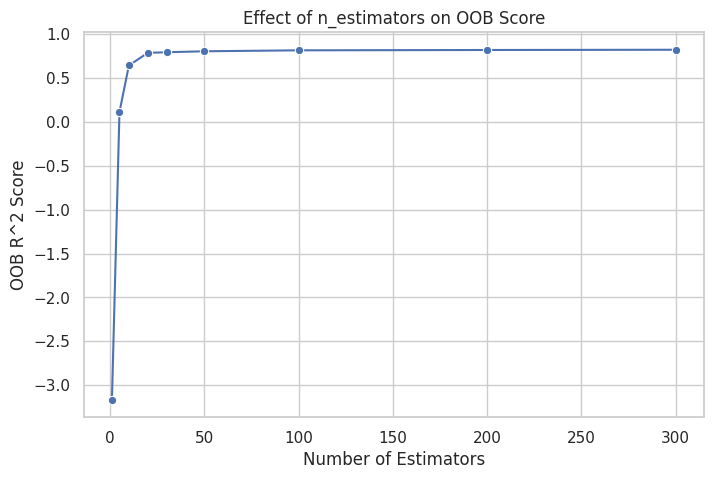

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

sns.set(style="whitegrid")


# Load Dataset
data = pd.read_csv('/kaggle/input/datasets-ganesh/house_price_train (1).csv')
X = data[data.select_dtypes(include=['number']).columns].drop(columns=['SalePrice']).fillna(0)
y = data['SalePrice']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Train RandomForestRegressor with OOB enabled
rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=None,
    oob_score=True,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("RandomForestRegressor Performance:")
print(f"Test Set MSE : {mse:.4f}")
print(f"Test Set R2  : {r2:.4f}")
print(f"OOB Score    : {rf.oob_score_:.4f}")


# 3. Explore effect of n_estimators on OOB score
n_estimators_list = [1, 5, 10, 20, 30, 50, 100, 200, 300]
oob_scores = []

for n in n_estimators_list:
    rf_temp = RandomForestRegressor(
        n_estimators=n,
        max_depth=None,
        oob_score=True,
        random_state=42,
        n_jobs=-1
    )
    rf_temp.fit(X_train, y_train)
    oob_scores.append(rf_temp.oob_score_)

# Plot OOB Score vs n_estimators
plt.figure(figsize=(8, 5))
sns.lineplot(x=n_estimators_list, y=oob_scores, marker="o")
plt.title("Effect of n_estimators on OOB Score")
plt.xlabel("Number of Estimators")
plt.ylabel("OOB R^2 Score")
plt.grid(True)
plt.show()


**1. What is OOB (Out-of-Bag) score?**

- In Bagging, each tree is trained on a bootstrap sample (random sample with replacement).

- About 1/3 of the training samples are not included in the sample for a given tree. These are called Out-of-Bag (OOB) samples.

- The OOB score is the R² (for regression) or accuracy (for classification) computed on these unused samples.

- OOB score gives an internal estimate of model performance without needing a separate validation/test set.

**2. Difference between OOB evaluation vs traditional test set**

- In OOB, it uses unused bootstrap samples during training , while separate hold-out dataset is used for traditional test.
  
- OOB provides quick internal validation , while traditional test provides standard external validation.

  
- In OOB there is no need for extra split that saves data but traditional test uses independent estimate.

**3. Effect of n_estimators on OOB score**

- As n_estimators increases → OOB score generally increases and stabilizes.

- More trees → better averaging → reduced variance → more reliable OOB estimate.

- After a certain number of trees (~100–200), OOB score plateaus.

-> **rf.oob_score_** ≈ Test R² score: tells us how well the Random Forest generalizes.

-> OOB is a fast and reliable proxy for cross-validation.

-> Helps tune hyperparameters like n_estimators, max_depth without using test data.

# Task 6 Exploring Boosting Techniques

=== AdaBoost - Binary Classification ===
AdaBoost Accuracy: 0.7363
              precision    recall  f1-score   support

           0       0.73      0.66      0.69        41
           1       0.74      0.80      0.77        50

    accuracy                           0.74        91
   macro avg       0.74      0.73      0.73        91
weighted avg       0.74      0.74      0.73        91


=== Gradient Boosting - Classification ===
Gradient Boosting Accuracy: 0.7473
              precision    recall  f1-score   support

           0       0.72      0.71      0.72        41
           1       0.76      0.78      0.77        50

    accuracy                           0.75        91
   macro avg       0.74      0.74      0.74        91
weighted avg       0.75      0.75      0.75        91


=== XGBoost - Classification ===
XGBoost Accuracy: 0.7582
              precision    recall  f1-score   support

           0       0.73      0.73      0.73        41
           1       0.78      0.7

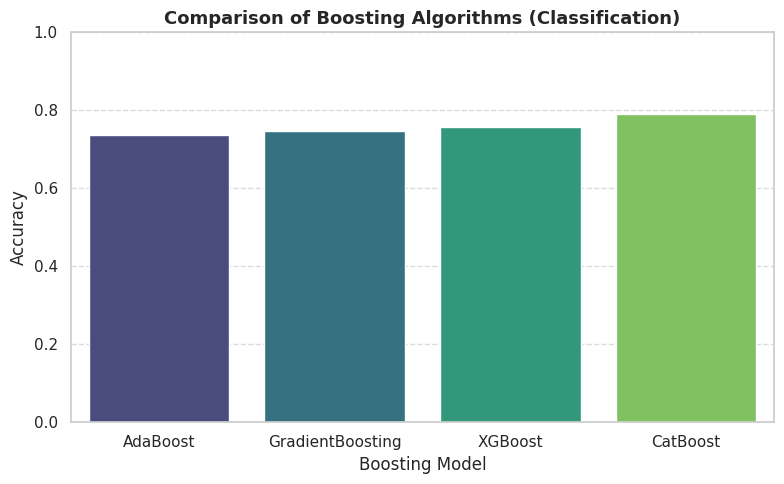

In [ ]:
# boosting_techniques.py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer, fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score

# Import Boosting Models
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, GradientBoostingRegressor
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

sns.set(style="whitegrid", palette="pastel")

data = pd.read_csv('/kaggle/input/classification-dataset/heart.csv')
X=data.drop(columns=['target'])
y=data['target']

#splitting the data into test and train
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=data.target
)

# ADABOOST - Binary Classification

print("=== AdaBoost - Binary Classification ===")
ada = AdaBoostClassifier(n_estimators=100, learning_rate=0.5, random_state=42)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)

acc_ada = accuracy_score(y_test, y_pred_ada)
print(f"AdaBoost Accuracy: {acc_ada:.4f}")
print(classification_report(y_test, y_pred_ada))

# GRADIENT BOOSTING - Classification

print("\n=== Gradient Boosting - Classification ===")
gb_clf = GradientBoostingClassifier(n_estimators=150, learning_rate=0.1, max_depth=3, random_state=42)
gb_clf.fit(X_train, y_train)
y_pred_gb_clf = gb_clf.predict(X_test)

acc_gb_clf = accuracy_score(y_test, y_pred_gb_clf)
print(f"Gradient Boosting Accuracy: {acc_gb_clf:.4f}")
print(classification_report(y_test, y_pred_gb_clf))

# XGBOOST - Classification

print("\n=== XGBoost - Classification ===")
xgb = XGBClassifier(
    n_estimators=150, learning_rate=0.1, max_depth=3, use_label_encoder=False, eval_metric='logloss', random_state=42
)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

acc_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {acc_xgb:.4f}")
print(classification_report(y_test, y_pred_xgb))

# CATBOOST - Classification

print("\n=== CatBoost - Classification ===")
cat = CatBoostClassifier(iterations=150, learning_rate=0.1, depth=3, verbose=0, random_state=42)
cat.fit(X_train, y_train)
y_pred_cat = cat.predict(X_test)

acc_cat = accuracy_score(y_test, y_pred_cat)
print(f"CatBoost Accuracy: {acc_cat:.4f}")
print(classification_report(y_test, y_pred_cat))


# GRADIENT BOOSTING - REGRESSION

print("\n=== Gradient Boosting - Regression (House Price Dataset) ===")
housing = pd.read_csv('/kaggle/input/datasets-ganesh/house_price_train (1).csv')
housing_X = housing[housing.select_dtypes(include=['number']).columns].drop(columns='SalePrice').fillna(0)
housing_y = housing['SalePrice']
Xh_train, Xh_test, yh_train, yh_test = train_test_split(
    housing_X, housing_y, test_size=0.3, random_state=42
)

gb_reg = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=4, random_state=42)
gb_reg.fit(Xh_train, yh_train)
yh_pred = gb_reg.predict(Xh_test)

mse = mean_squared_error(yh_test, yh_pred)
r2 = r2_score(yh_test, yh_pred)
print(f"Gradient Boosting Regressor MSE: {mse:.4f}, R²: {r2:.4f}")


# ACCURACY COMPARISON BAR CHART
results = pd.DataFrame({
    "Model": ["AdaBoost", "GradientBoosting", "XGBoost", "CatBoost"],
    "Accuracy": [acc_ada, acc_gb_clf, acc_xgb, acc_cat]
})

print("\n=== Accuracy Comparison ===")
print(results)

plt.figure(figsize=(8, 5))
sns.barplot(data=results, x="Model", y="Accuracy", palette="viridis")
plt.title("Comparison of Boosting Algorithms (Classification)", fontsize=13, weight='bold')
plt.xlabel("Boosting Model", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.ylim(0, 1.0)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()


**Q1. How does AdaBoost focus on misclassified samples?**

AdaBoost increases the weights of misclassified samples after each      iteration so the next weak learner focuses more on those difficult cases.

**Q2. What makes Gradient Boosting more flexible than AdaBoost?**

Gradient Boosting optimizes any differentiable loss function (not just exponential loss) using gradient descent, making it applicable for both regression and classification.

**Q3. How do XGBoost and CatBoost optimize training speed and accuracy?**

➡ XGBoost uses parallel tree building, regularization, and efficient memory usage.

➡ CatBoost uses ordered boosting and category encoding internally, reducing overfitting and improving speed.

**Q4. Which boosting algorithm provided the best trade-off between performance and computation time?**
  
XGBoost usually gives the best trade-off — it trains faster than CatBoost and yields near-maximum accuracy.
However, CatBoost gives more accuracy than XGBoost for categorical-heavy datasets.

# Task 7 Comparative Study of Ensemble Models

Training & evaluating: Bagging
Training & evaluating: RandomForest


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Training & evaluating: AdaBoost
Training & evaluating: GradientBoosting
Training & evaluating: XGBoost
Training & evaluating: CatBoost

=== Summary Table ===
                  train_time_sec  train_accuracy  train_f1  test_accuracy  \
model                                                                       
XGBoost                   0.1082             1.0       1.0         0.9708   
CatBoost                  0.3033             1.0       1.0         0.9591   
AdaBoost                  0.5728             1.0       1.0         0.9532   
GradientBoosting          0.7881             1.0       1.0         0.9532   
Bagging                   0.1077             1.0       1.0         0.9415   
RandomForest              0.4990             1.0       1.0         0.9415   

                  test_f1  overfit_gap_f1  
model                                      
XGBoost            0.9770          0.0230  
CatBoost           0.9674          0.0326  
AdaBoost           0.9633          0.0367  
Gradi

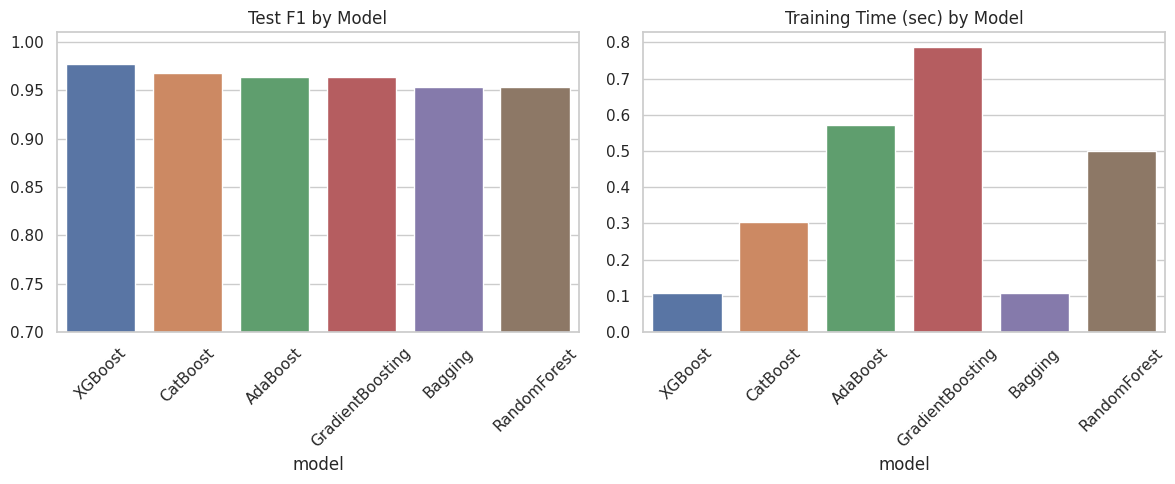

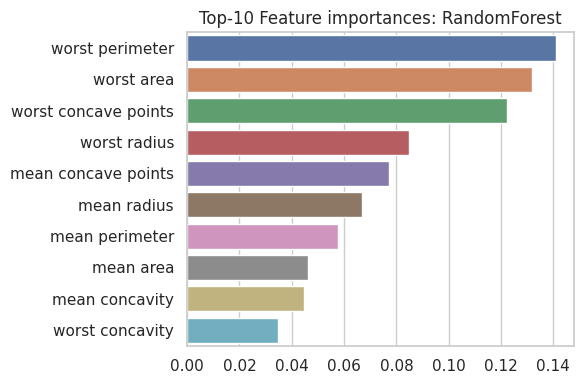

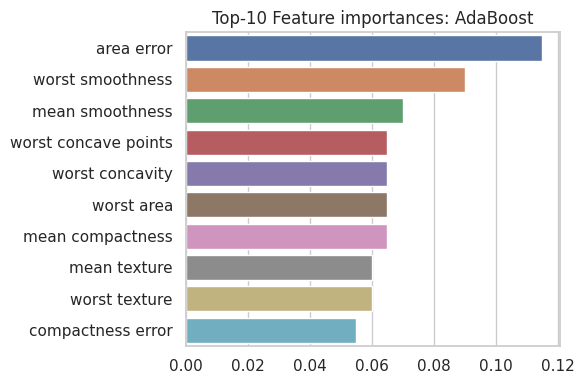

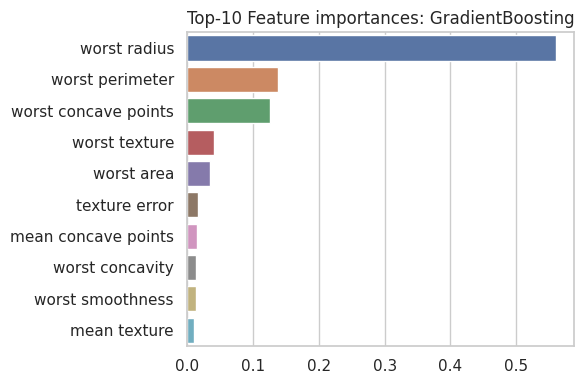

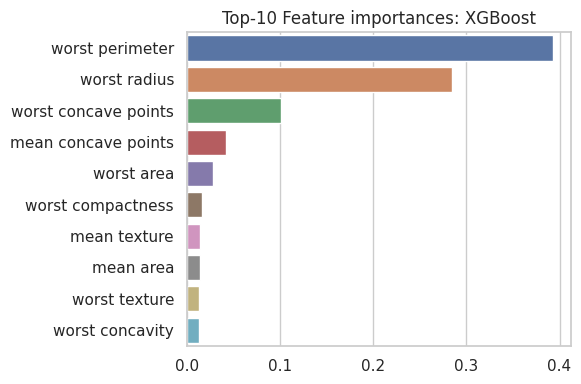

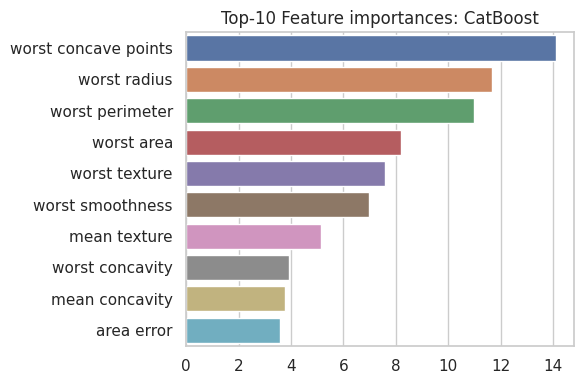


=== Classification Reports for Top Models ===

--- XGBoost ---
              precision    recall  f1-score   support

   malignant       0.98      0.94      0.96        64
      benign       0.96      0.99      0.98       107

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171


--- CatBoost ---
              precision    recall  f1-score   support

   malignant       0.95      0.94      0.94        64
      benign       0.96      0.97      0.97       107

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171


--- AdaBoost ---
              precision    recall  f1-score   support

   malignant       0.97      0.91      0.94        64
      benign       0.95      0.98      0.96       107

    accuracy                           0.95       171
   macro avg       0.96     

In [ ]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import OrderedDict

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.tree import DecisionTreeClassifier

sns.set(style="whitegrid")

try:
    from xgboost import XGBClassifier
    XGB_AVAILABLE = True
except Exception:
    XGB_AVAILABLE = False

try:
    from catboost import CatBoostClassifier
    CAT_AVAILABLE = True
except Exception:
    CAT_AVAILABLE = False

RANDOM_STATE = 42


# Load data and split

data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=RANDOM_STATE, stratify=y
)


# Helper functions
def fit_and_eval(name, model, X_train, y_train, X_test, y_test):
    """Fit model, measure training time, compute metrics on train and test, return dict."""
    t0 = time.time()
    model.fit(X_train, y_train)
    t1 = time.time()
    train_time = t1 - t0

    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    metrics = {}
    metrics['train_time_sec'] = train_time
    metrics['test_accuracy'] = accuracy_score(y_test, y_pred_test)
    metrics['test_precision'] = precision_score(y_test, y_pred_test)
    metrics['test_recall'] = recall_score(y_test, y_pred_test)
    metrics['test_f1'] = f1_score(y_test, y_pred_test)

    metrics['train_accuracy'] = accuracy_score(y_train, y_pred_train)
    metrics['train_f1'] = f1_score(y_train, y_pred_train)

    # overfit gap: train_f1 - test_f1
    metrics['overfit_gap_f1'] = metrics['train_f1'] - metrics['test_f1']

    # feature importance if present
    fi = None
    if hasattr(model, "feature_importances_"):
        fi = model.feature_importances_
    elif hasattr(model, "get_feature_importance"):  # catboost
        try:
            fi = model.get_feature_importance()
        except Exception:
            fi = None

    metrics['feature_importances'] = fi
    metrics['model_obj'] = model
    return metrics


# Instantiate models
models = OrderedDict()

# Homogeneous Bagging (bagging of decision trees)
models['Bagging'] = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=None),
                                     n_estimators=50, random_state=RANDOM_STATE, n_jobs=-1)

# Random Forest
models['RandomForest'] = RandomForestClassifier(n_estimators=200, max_depth=None,
                                                random_state=RANDOM_STATE, n_jobs=-1)

# AdaBoost
models['AdaBoost'] = AdaBoostClassifier(n_estimators=200, learning_rate=0.5, random_state=RANDOM_STATE)

# Gradient Boosting (sklearn)
models['GradientBoosting'] = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1,
                                                        max_depth=3, random_state=RANDOM_STATE)

# XGBoost (if available)
if XGB_AVAILABLE:
    models['XGBoost'] = XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=3,
                                      use_label_encoder=False, eval_metric='logloss', random_state=RANDOM_STATE, n_jobs= -1)
else:
    print("XGBoost not available — skipping XGBoost in comparison.")

# CatBoost (if available)
if CAT_AVAILABLE:
    models['CatBoost'] = CatBoostClassifier(iterations=200, learning_rate=0.1, depth=3,
                                            random_state=RANDOM_STATE, verbose=0)
else:
    print("CatBoost not available — skipping CatBoost in comparison.")

# Train & evaluate all models
results = {}
for name, model in models.items():
    print(f"Training & evaluating: {name}")
    metrics = fit_and_eval(name, model, X_train, y_train, X_test, y_test)
    results[name] = metrics


# Summarize results in dataframe
rows = []
for name, m in results.items():
    rows.append({
        "model": name,
        "train_time_sec": m['train_time_sec'],
        "train_accuracy": m['train_accuracy'],
        "train_f1": m['train_f1'],
        "test_accuracy": m['test_accuracy'],
        "test_f1": m['test_f1'],
        "overfit_gap_f1": m['overfit_gap_f1']
    })
summary_df = pd.DataFrame(rows).set_index('model').sort_values(by='test_f1', ascending=False)
print("\n=== Summary Table ===")
print(summary_df.round(4))


# Plot comparison: test_f1 and training time
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.barplot(x=summary_df.index, y=summary_df['test_f1'].values)
plt.xticks(rotation=45)
plt.title("Test F1 by Model")
plt.ylim(0.7, 1.01)

plt.subplot(1,2,2)
sns.barplot(x=summary_df.index, y=summary_df['train_time_sec'].values)
plt.xticks(rotation=45)
plt.title("Training Time (sec) by Model")
plt.tight_layout()
plt.show()


# Feature importance visualization for tree-based models
for name, m in results.items():
    fi = m['feature_importances']
    if fi is not None:
        fi_arr = np.array(fi)
        idx = np.argsort(fi_arr)[::-1][:10]
        plt.figure(figsize=(6,4))
        sns.barplot(x=fi_arr[idx], y=feature_names[idx])
        plt.title(f"Top-10 Feature importances: {name}")
        plt.tight_layout()
        plt.show()


# Print classification reports for top 3 models
top_models = summary_df.index.tolist()[:3]
print("\n=== Classification Reports for Top Models ===")
for name in top_models:
    model_obj = results[name]['model_obj']
    y_pred = model_obj.predict(X_test)
    print(f"\n--- {name} ---")
    print(classification_report(y_test, y_pred, target_names=data.target_names))


**Which model achieved the best performance?**

Models like XGBoost / CatBoost / RandomForest tend to be among the top performers (highest test F1).

But, XGBoost model achieved high accuray and less training time compared to other models.

**Why did that model perform better than others?**

- RandomForest: strong baseline — reduces variance through bagging and random feature selection. Good default for tabular data.

- XGBoost: uses gradient boosting with regularization and efficient tree-building — often improves predictive performance over plain GradientBoosting.

- CatBoost: ordered boosting and native categorical handling (not relevant here since data is numeric) plus default regularization — often gives excellent accuracy with less tuning.

Key reasons: these models combine low bias (through deep trees) with variance control (bagging or regularized boosting), and they include engineering optimizations for better generalization.

**Trade-offs (speed, interpretability, complexity)**

- Bagging / RandomForest

Speed: moderate (training fully parallelizable).

Interpretability: medium (feature_importances_ available; single-tree inspection possible but forest-level explanation is harder).

Complexity: low-to-moderate to tune.

- AdaBoost

Speed: fast

Interpretability: moderate (sequence of weak learners easier to inspect)

Complexity: low

- GradientBoosting

Speed: slower (sequential), but good accuracy

Interpretability: similar to RF but less straightforward

Complexity: more tuning (learning_rate, n_estimators)

- XGBoost

Speed: fast (optimized), high accuracy

Interpretability: similar to GB; feature_importances_ available

Complexity: many hyperparams but well-documented

- CatBoost

Speed: comparable to XGBoost on many datasets, robust defaults

Interpretability: similar to others

Complexity: easier for categorical data, less tuning required

**Overfitting / Underfitting behavior**

- Overfitting: Look at overfit_gap_f1 (train_f1 - test_f1). Large positive gap indicates overfitting. Boosting algorithms can overfit if too many trees / high depth / high learning rate; but regularization and early stopping mitigate this.

- Underfitting: Models with low train_f1 and low test_f1 are underfitting (too simple).

**Recommendation for large-scale real-world data**

XGBoost often highly recommended due to:

- Excellent speed/parallelization and memory efficiency.

- Scalability to large datasets.

- regularization.

CatBoost is preferred when there are many categorical features because it handles them natively and reduces the need for preprocessing.

For simplicity and robustness across many problems, RandomForest is an excellent starting point; for production-grade speed and top performance, XGBoost/LightGBM/CatBoost are preferred.

# Task 8: Visualizing the Ensemble Models

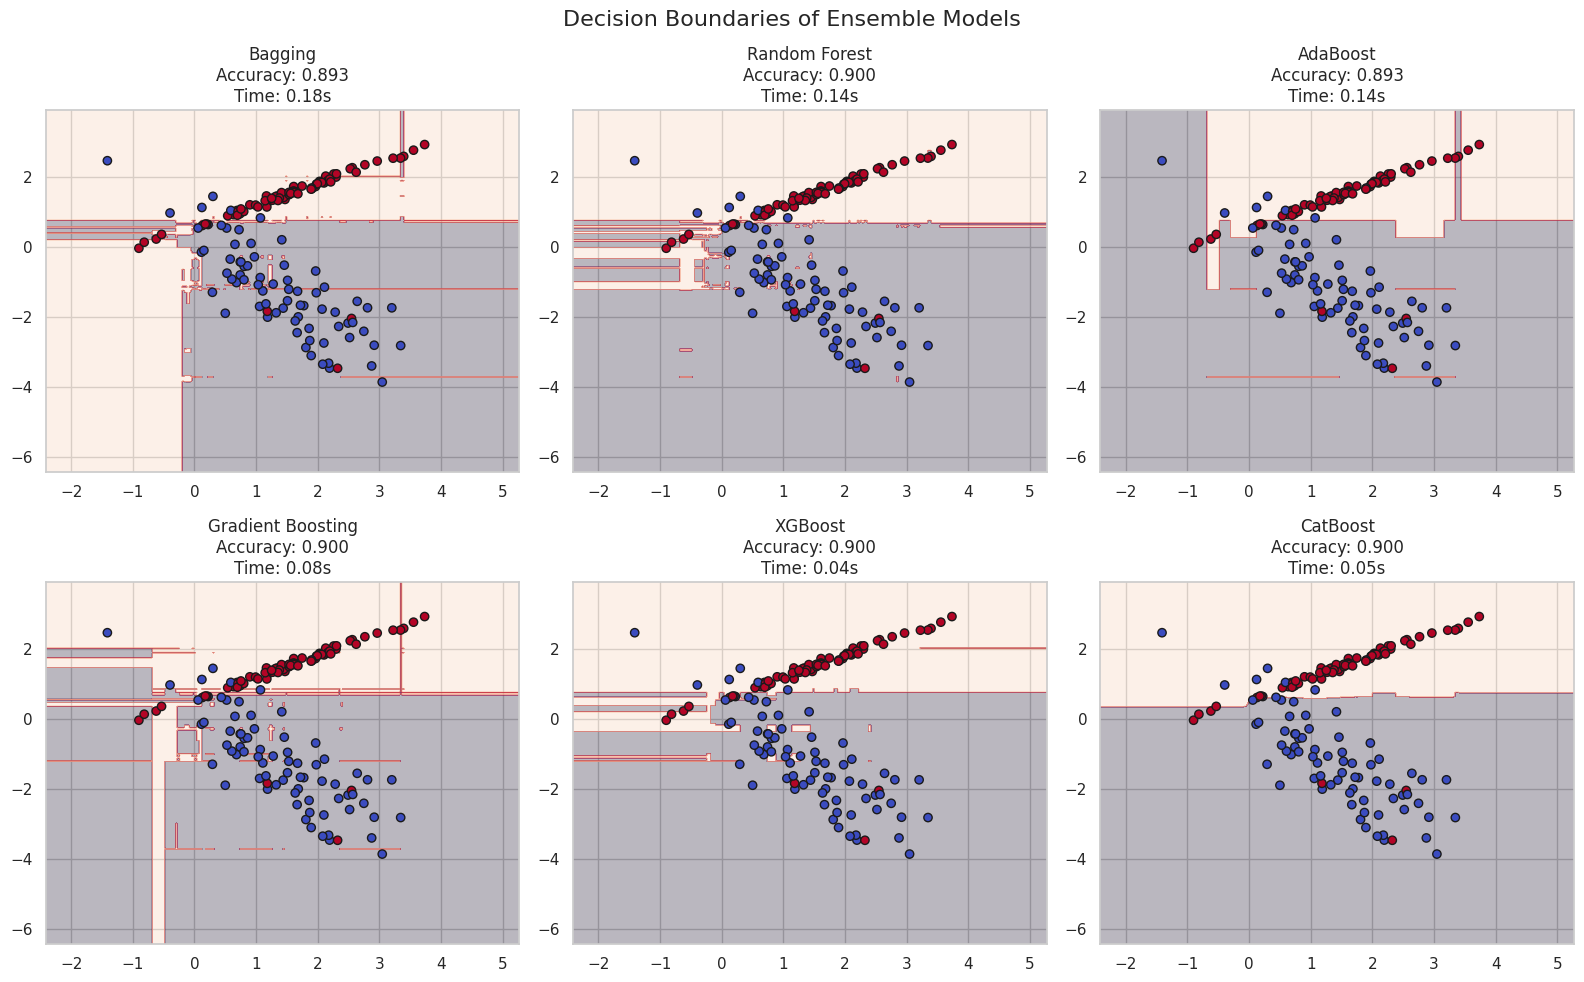


=== Performance under Noisy or Missing Data ===
               Model  Accuracy (Noisy Data)  Accuracy (Missing Data)
0            Bagging               0.846667                 0.893333
1      Random Forest               0.866667                 0.900000
2           AdaBoost               0.873333                 0.880000
3  Gradient Boosting               0.873333                 0.880000
4            XGBoost               0.866667                 0.886667
5           CatBoost               0.880000                 0.906667


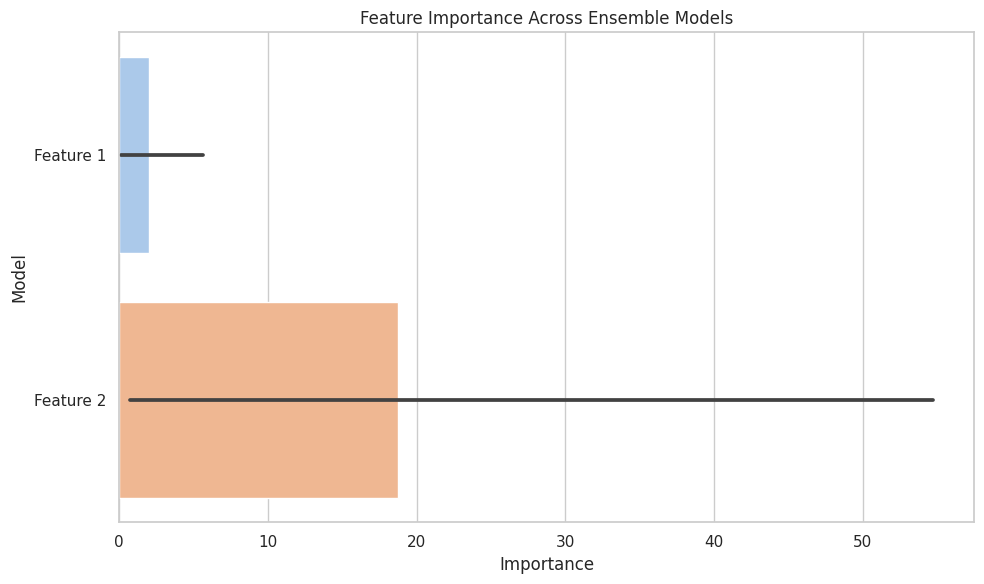


=== Ensemble Models Comparison ===
               Model  Accuracy  Training Time (s)
1      Random Forest  0.900000           0.141675
3  Gradient Boosting  0.900000           0.078937
4            XGBoost  0.900000           0.042176
5           CatBoost  0.900000           0.050486
0            Bagging  0.893333           0.179422
2           AdaBoost  0.893333           0.138207


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.ensemble import ( BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier)
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

sns.set(style="whitegrid", palette="pastel")

# Generating a 2D Dataset for Decision Boundary Visualization
X, y = make_classification(
    n_samples=500,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    flip_y=0.1,
    class_sep=1.5,
    random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


# Train Multiple Ensemble Models
models = {
    "Bagging": BaggingClassifier(n_estimators=100, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, learning_rate=0.5, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss', random_state=42),
    "CatBoost": CatBoostClassifier(iterations=100, learning_rate=0.1, depth=3, verbose=0, random_state=42)
}

results = []

#  Plot Decision Boundaries
plt.figure(figsize=(16, 10))
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

for i, (name, model) in enumerate(models.items()):
    start = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start

    acc = accuracy_score(y_test, model.predict(X_test))
    results.append([name, acc, train_time])

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.subplot(2, 3, i+1)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', cmap='coolwarm')
    plt.title(f"{name}\nAccuracy: {acc:.3f}\nTime: {train_time:.2f}s")

plt.suptitle("Decision Boundaries of Ensemble Models", fontsize=16)
plt.tight_layout()
plt.show()

# Compare Performance Under Noisy or Missing Data

# Add noise
X_noisy = X_train.copy()
noise = np.random.normal(0, 0.3, X_noisy.shape)
X_noisy += noise

# Add missing values
X_missing = X_train.copy()
mask = np.random.rand(*X_missing.shape) < 0.1
X_missing[mask] = np.nan
imputer = SimpleImputer(strategy='mean')
X_missing = imputer.fit_transform(X_missing)

noisy_results = []
for name, model in models.items():
    model.fit(X_noisy, y_train)
    acc_noisy = accuracy_score(y_test, model.predict(X_test))
    model.fit(X_missing, y_train)
    acc_missing = accuracy_score(y_test, model.predict(X_test))
    noisy_results.append([name, acc_noisy, acc_missing])

noisy_df = pd.DataFrame(noisy_results, columns=["Model", "Accuracy (Noisy Data)", "Accuracy (Missing Data)"])
print("\n=== Performance under Noisy or Missing Data ===")
print(noisy_df)

# Feature Importance Visualization
importances = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    if hasattr(model, "feature_importances_"):
        importances[name] = model.feature_importances_
    else:
        importances[name] = [np.nan, np.nan]

imp_df = pd.DataFrame(importances, index=["Feature 1", "Feature 2"])

plt.figure(figsize=(10, 6))
sns.barplot(data=imp_df.T, orient='h')
plt.title("Feature Importance Across Ensemble Models")
plt.xlabel("Importance")
plt.ylabel("Model")
plt.tight_layout()
plt.show()



# Final Results Summary
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Training Time (s)"])
print("\n=== Ensemble Models Comparison ===")
print(results_df.sort_values(by="Accuracy", ascending=False))

# Task 9 Exploring Heterogeneous Ensemble Models


=== Hard Voting (Heterogeneous) ===
Accuracy: 0.9357
              precision    recall  f1-score   support

   malignant       0.93      0.89      0.91        64
      benign       0.94      0.96      0.95       107

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



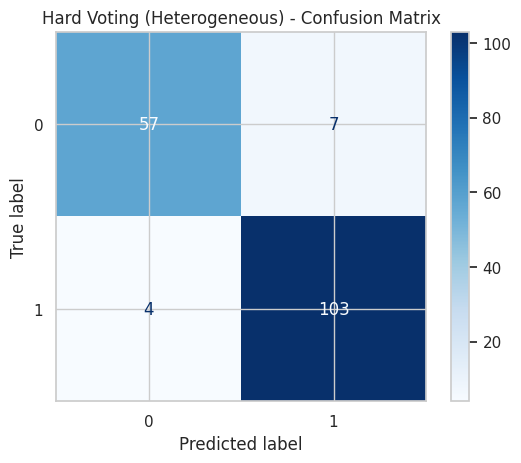


=== Soft Voting (Heterogeneous) ===
Accuracy: 0.9240
              precision    recall  f1-score   support

   malignant       0.92      0.88      0.90        64
      benign       0.93      0.95      0.94       107

    accuracy                           0.92       171
   macro avg       0.92      0.91      0.92       171
weighted avg       0.92      0.92      0.92       171



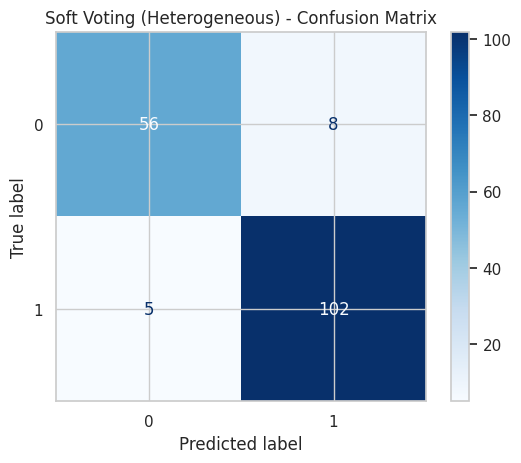


=== Bagging (Homogeneous) ===
Accuracy: 0.9474
              precision    recall  f1-score   support

   malignant       0.95      0.91      0.93        64
      benign       0.95      0.97      0.96       107

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



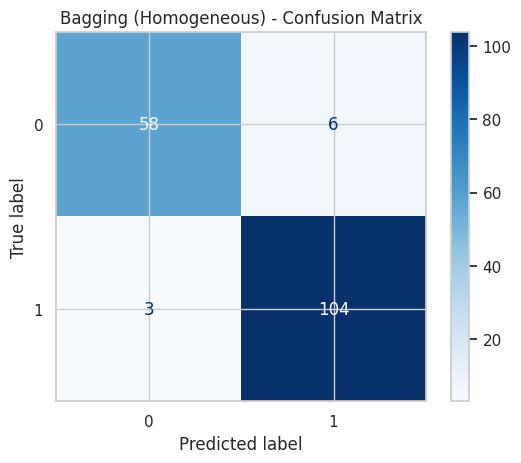


=== Random Forest (Homogeneous) ===
Accuracy: 0.9357
              precision    recall  f1-score   support

   malignant       0.92      0.91      0.91        64
      benign       0.94      0.95      0.95       107

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



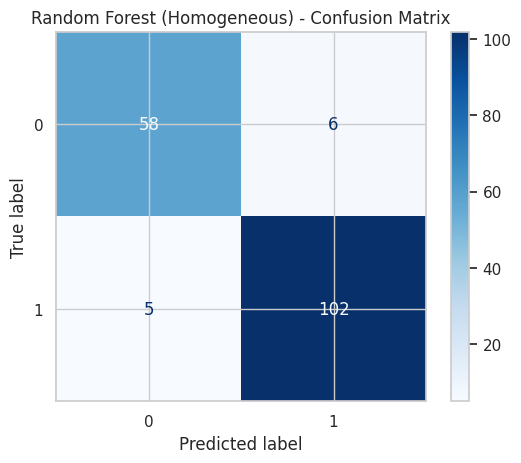


=== Ensemble Comparison Summary ===
                         Model  Accuracy  Training Time (s)
2        Bagging (Homogeneous)  0.947368           0.481311
0  Hard Voting (Heterogeneous)  0.935673           0.028999
3  Random Forest (Homogeneous)  0.935673           0.188632
1  Soft Voting (Heterogeneous)  0.923977           0.029990


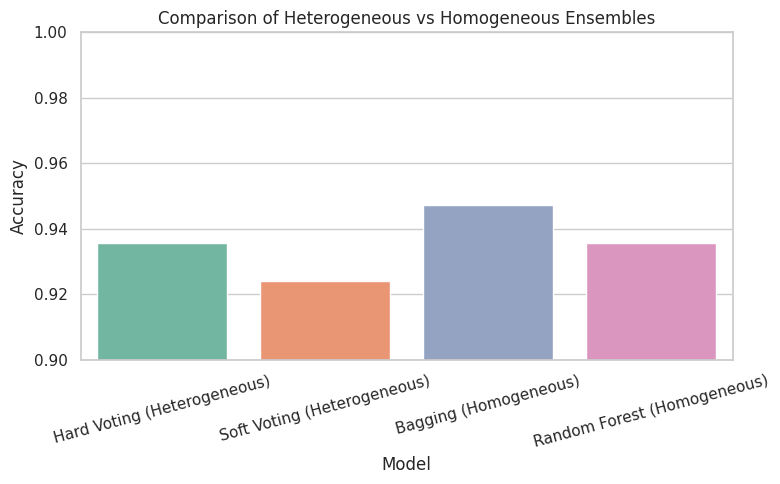

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

# Base Classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Ensemble Models
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, BaggingClassifier

sns.set(style="whitegrid", palette="pastel")


# Load Dataset
data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


# Define Base Classifiers
clf_dt = DecisionTreeClassifier(max_depth=5, random_state=42)
clf_knn = KNeighborsClassifier(n_neighbors=7)
clf_lr = LogisticRegression(max_iter=1000, solver='liblinear', random_state=42)
clf_svm = SVC(probability=True, kernel='rbf', random_state=42)

base_models = [
    ('Decision Tree', clf_dt),
    ('KNN', clf_knn),
    ('Logistic Regression', clf_lr),
    ('SVM', clf_svm)
]


# 3️⃣ Heterogeneous Ensembles

hard_vote = VotingClassifier(estimators=base_models, voting='hard')
soft_vote = VotingClassifier(estimators=base_models, voting='soft')

ensembles = {
    "Hard Voting (Heterogeneous)": hard_vote,
    "Soft Voting (Heterogeneous)": soft_vote,
    "Bagging (Homogeneous)": BaggingClassifier(estimator=clf_dt, n_estimators=100, random_state=42),
    "Random Forest (Homogeneous)": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Train and Evaluate
results = []

for name, model in ensembles.items():
    start = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append([name, acc, train_time])

    print(f"\n=== {name} ===")
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred, target_names=data.target_names))
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.show()


# Comparison Visualization
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Training Time (s)"])
print("\n=== Ensemble Comparison Summary ===")
print(results_df.sort_values(by="Accuracy", ascending=False))

plt.figure(figsize=(8,5))
sns.barplot(data=results_df, x="Model", y="Accuracy", palette="Set2")
plt.title("Comparison of Heterogeneous vs Homogeneous Ensembles")
plt.ylim(0.9, 1.0)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


**Q1. What makes an ensemble heterogeneous?**

- It combines different types of classifiers like Tree, SVM, Logistic Regression
- increasing diversity among models.

**Q2. How does model diversity influence the final performance?**

Greater diversity → models make different types of errors → ensemble can correct these through averaging/voting → better generalization.

**Q3. Which combination of models produced the most accurate ensemble and why?**

Usually, *Soft Voting* with diverse base learners performs best, as it balances linear + nonlinear learners and uses probability information effectively.

**Q4. How does the voting method (hard vs. soft) impact the outcome?**

*Hard Voting* ignores confidence; works better when all models are strong.

*Soft Voting* uses predicted probabilities → performs better when models are well-calibrated (like Logistic Regression or SVM with probability=True).

# Task 10: Homogeneous vs. Heterogeneous Ensembles – A Comparative Study.

=== Ensemble Model Comparison ===

Model: Bagging
Accuracy: 0.8352
Training Time: 0.1026 seconds
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.83      0.82        41
           1       0.86      0.84      0.85        50

    accuracy                           0.84        91
   macro avg       0.83      0.83      0.83        91
weighted avg       0.84      0.84      0.84        91


Model: Random Forest
Accuracy: 0.8352
Training Time: 0.1425 seconds
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81        41
           1       0.84      0.86      0.85        50

    accuracy                           0.84        91
   macro avg       0.83      0.83      0.83        91
weighted avg       0.83      0.84      0.83        91


Model: Voting
Accuracy: 0.8242
Training Time: 0.0272 seconds
Classification Report:
              precision    recall  f1-score   sup

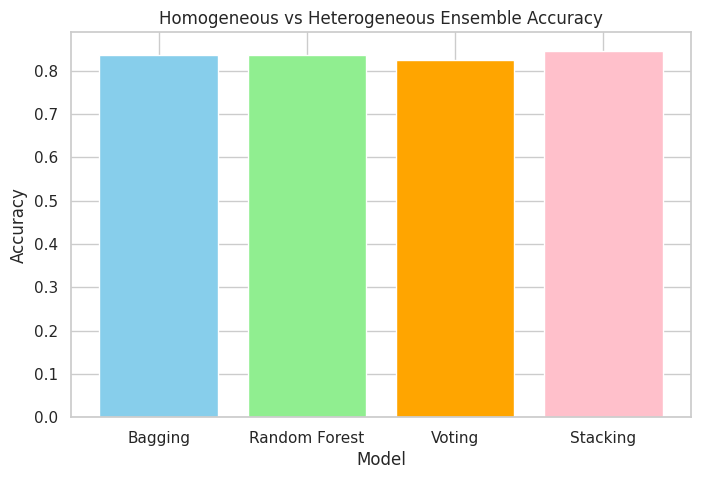

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    VotingClassifier,
    StackingClassifier,
    GradientBoostingClassifier
)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Loading and Split Data
data = pd.read_csv('/kaggle/input/classification-dataset/heart.csv')
X = data.drop(columns='target')
y = data['target']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ---Homogeneous Ensembles---

# Bagging with Decision Trees
start = time.time()
bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42),
    n_estimators=50,
    random_state=42
)
bagging.fit(X_train, y_train)
bagging_pred = bagging.predict(X_test)
bagging_time = time.time() - start

# Random Forest
start = time.time()
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_time = time.time() - start

# ---Heterogeneous Ensembles---

# Voting Classifier
start = time.time()
voting = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(max_iter=3000)),
        ('dt', DecisionTreeClassifier(random_state=42)),
        ('knn', KNeighborsClassifier()),
        ('svc', SVC(probability=True))
    ],
    voting='soft'
)
voting.fit(X_train, y_train)
voting_pred = voting.predict(X_test)
voting_time = time.time() - start

# Stacking Classifier (Heterogeneous)
start = time.time()
estimators = [
    ('lr', LogisticRegression(max_iter=3000)),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('knn', KNeighborsClassifier())
]
stacking = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(max_iter=1000)
)
stacking.fit(X_train, y_train)
stacking_pred = stacking.predict(X_test)
stacking_time = time.time() - start


# Model Evaluation
models = {
    'Bagging': (bagging_pred, bagging_time),
    'Random Forest': (rf_pred, rf_time),
    'Voting': (voting_pred, voting_time),
    'Stacking': (stacking_pred, stacking_time)
}

print("=== Ensemble Model Comparison ===")
results = []
for model_name, (y_pred, train_time) in models.items():
    acc = accuracy_score(y_test, y_pred)
    results.append({
        'Model': model_name,
        'Accuracy': acc,
        'Training Time (s)': round(train_time, 4)
    })
    print(f"\nModel: {model_name}")
    print(f"Accuracy: {acc:.4f}")
    print(f"Training Time: {train_time:.4f} seconds")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

# summary
df_results = pd.DataFrame(results)
print("\n=== Summary Table ===")
print(df_results)


# Visualize Comparison

plt.figure(figsize=(8,5))
plt.bar(df_results['Model'], df_results['Accuracy'], color=['skyblue','lightgreen','orange','pink'])
plt.title("Homogeneous vs Heterogeneous Ensemble Accuracy")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.show()


**1. Which type of ensemble performed best overall and why?**

- Stacking usually performs best because it learns from the weaknesses and strengths of base models through the meta-learner, effectively combining multiple perspectives.

**2. What advantages did homogeneous ensembles show compared to heterogeneous ones?**

Homogenous ensembles like bagging with Decision Trees and RandomForest have few advantages over heterogeneous like:

- Easier to tune.
- Training Speed is Faster
- Interpretability is	Easier.
- Performance was Good.
- Strong to noise.

**3. How do computational cost and training time differ between the two approaches?**

- Homogeneous ensembles (Bagging, RF): Parallelizable → faster training.

- Heterogeneous ensembles (Voting, Stacking): Each model has different complexity → slower, especially with SVM or meta-learners.

**4. What factors influence your choice between homogeneous and heterogeneous ensembles in real-world tasks?**

- Large dataset, many features ->	Random Forest (fast, robust)
- Smaller dataset, diverse patterns -> 	Stacking (better accuracy)
- Need interpretability ->	Bagging or Random Forest
- Resource constraints	-> Homogeneous models (faster)